In [46]:
#Importamos las bibliotecas que usameros
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.plotly as py



In [2]:
#Cargamos nuestra base de datos con la que trabajaremos y le cambiamos algunas propiedades
df0= pd.read_csv('caborca.txt', skiprows=20, skipfooter=1, sep='\s+',header=None, names=["NFECHA","PRECIP","EVAP","TMAX","TMIN"], engine='python')
df0.head()

,NFECHA,PRECIP,EVAP,TMAX,TMIN
0,01/08/1977,0,11.5,40,27
1,02/08/1977,0,10.9,39,27
2,03/08/1977,0,11.5,42,25
3,04/08/1977,0,11.5,43,24
4,05/08/1977,0,10.8,43,24


In [3]:
#Le damos estructura a los datos
df = pd.DataFrame(df0)

In [4]:
#Tipos de datos que Pandas decteca en nuestros datos
df.dtypes

NFECHA    object
PRECIP    object
EVAP      object
TMAX      object
TMIN      object
dtype: object

In [5]:
#Cambiamos los valores nulos a NaN
df['PRECIP']=df['PRECIP'].str.replace('Nulo','NaN').astype(np.float64)
df['EVAP']=df['EVAP'].str.replace('Nulo','NaN').astype(np.float64)
df['TMAX']=df['TMAX'].str.replace('Nulo','NaN').astype(np.float64)
df['TMIN']=df['TMIN'].str.replace('Nulo','NaN').astype(np.float64)

In [6]:
#Cambiamos el tipo de fecha: de object a Time
df['FECHA']=pd.to_datetime(df.apply(lambda x: x['NFECHA'],1), dayfirst=True)
df=df.drop(['NFECHA'],1)
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,11.5,40.0,27.0,1977-08-01
1,0.0,10.9,39.0,27.0,1977-08-02
2,0.0,11.5,42.0,25.0,1977-08-03
3,0.0,11.5,43.0,24.0,1977-08-04
4,0.0,10.8,43.0,24.0,1977-08-05


In [7]:
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [8]:
#Creando nuevas columnas para los meses y los años
df['MONTH']=df['FECHA'].dt.month
df['YEAR']=df['FECHA'].dt.year
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MONTH,YEAR
0,0.0,11.5,40.0,27.0,1977-08-01,8,1977
1,0.0,10.9,39.0,27.0,1977-08-02,8,1977
2,0.0,11.5,42.0,25.0,1977-08-03,8,1977
3,0.0,11.5,43.0,24.0,1977-08-04,8,1977
4,0.0,10.8,43.0,24.0,1977-08-05,8,1977


In [9]:
#Calcululando el numero de años en los que se tienen registros en el DataFrame
n=df['FECHA'].dt.year.unique()
len(n)

12

In [10]:
#Calculando los mese con mas lluvias 
r1=df[df.MONTH==1].PRECIP.sum()/len(n)
print("ENE",r1,"mm")
r2=df[df.MONTH==2].PRECIP.sum()/len(n)
print("FEB",r2,"mm")
r3=df[df.MONTH==3].PRECIP.sum()/len(n)
print("MAR",r3,"mm")
r4=df[df.MONTH==4].PRECIP.sum()/len(n)
print("ABR",r4,"mm")
r5=df[df.MONTH==5].PRECIP.sum()/len(n)
print("MAY",r5,"mm")
r6=df[df.MONTH==6].PRECIP.sum()/len(n)
print("JUN",r6,"mm")
r7=df[df.MONTH==7].PRECIP.sum()/len(n)
print("JUL",r7,"mm")
r8=df[df.MONTH==8].PRECIP.sum()/len(n)
print("AGO",r8,"mm")
r9=df[df.MONTH==9].PRECIP.sum()/len(n)
print("SEP",r9,"mm")
r10=df[df.MONTH==10].PRECIP.sum()/len(n)
print("OCT",r10,"mm")
r11=df[df.MONTH==11].PRECIP.sum()/len(n)
print("NOV",r11,"mm")
r12=df[df.MONTH==12].PRECIP.sum()/len(n)
print("DIC",r12,"mm")



ENE 23.833333333333332 mm
FEB 11.799999999999999 mm
MAR 16.566666666666666 mm
ABR 5.6000000000000005 mm
MAY 0.9833333333333334 mm
JUN 1.2333333333333334 mm
JUL 55.875 mm
AGO 72.19166666666668 mm
SEP 28.23333333333333 mm
OCT 16.483333333333334 mm
NOV 20.241666666666667 mm
DIC 33.416666666666664 mm


In [11]:
#Gráfica de las precipitacónes por mes 

y = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12]
N = len(y)
#x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC')
x = (1,2,3,4,5,6,7,8,9,10,11,12)

width = 1/1.15
plt.bar(x, y, width, color="red")
plt.ylabel('Precipitación en mm')
plt.xlabel('Meses')
plt.title('Precipitación acumulada por mes')

fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig, filename='Presipitacón por mes')

In [12]:
#Calculando la precipitación por año 
init = df.YEAR.min()
AÑO = [init + i for i in range(0,28)]
AÑOS = [ df[df.YEAR==(init + i)].PRECIP.sum() for i in range(0,28)]

d = {'AÑO': AÑOS, 'PRECIP_TOTAL': AÑOS}
df2 = pd.DataFrame(data=d)
df2.head()



,AÑO,PRECIP_TOTAL
0,125.3,125.3
1,297.3,297.3
2,222.8,222.8
3,70.2,70.2
4,210.7,210.7


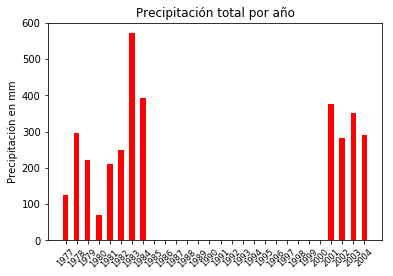

In [13]:
#Creando la gráfica de la precipitacón por año
date = AÑO
N = np.arange(len(date))
PRECIPIT= AÑOS
 
plt.bar(N, PRECIPIT,  width=0.5,align='center',color='red')
plt.xticks(N, date, size = 'small', color = 'black', rotation = 45)
plt.ylabel('Precipitación en mm')
plt.title('Precipitación total por año')
plt.show()

In [14]:
#Calculando los meses más calidos 
for i in range(1,12):
    tmax=df[df.MONTH==i].TMAX.mean()
    print('mes',i,tmax,'℃')

mes 1 21.059587020648966 ℃
mes 2 22.389644012944984 ℃
mes 3 25.304545454545455 ℃
mes 4 29.536666666666665 ℃
mes 5 35.41348973607038 ℃
mes 6 39.985 ℃
mes 7 40.36135693215339 ℃
mes 8 38.892183288409704 ℃
mes 9 37.78272980501393 ℃
mes 10 32.30177514792899 ℃
mes 11 25.536585365853657 ℃


In [15]:
#Calculando los meses más frio 
for i in range(1,12):
    tmin=df[df.MONTH==i].TMIN.mean()
    print('mes',i,tmin,'℃')

mes 1 5.212609970674487 ℃
mes 2 5.771704180064309 ℃
mes 3 7.873493975903615 ℃
mes 4 10.431666666666667 ℃
mes 5 13.939882697947214 ℃
mes 6 19.09 ℃
mes 7 23.639296187683286 ℃
mes 8 23.40456989247312 ℃
mes 9 21.227777777777778 ℃
mes 10 14.491176470588234 ℃
mes 11 8.365151515151515 ℃


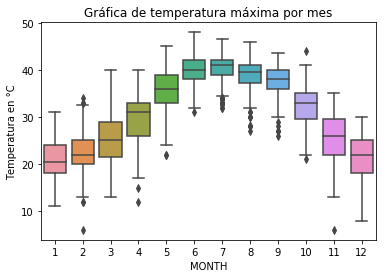

In [16]:
#Gráfica de temperatura máxima por mes
import seaborn as sns
w1 = sns.boxplot(x="MONTH", y="TMAX", data=df)
plt.title("Gráfica de temperatura máxima por mes")
plt.ylabel ("Temperatura en °C")
plt.show()


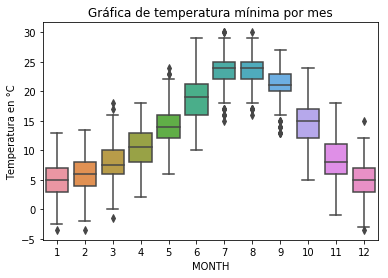

In [17]:
#Gráfica de temperatura mínima por mes
w2 = sns.boxplot(x="MONTH", y="TMIN", data=df)
plt.title("Gráfica de temperatura mínima por mes")
plt.ylabel ("Temperatura en °C")
plt.show()


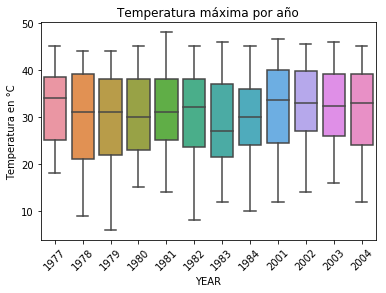

In [18]:
#Gráfica de temperatura máxima por año
w3 = sns.boxplot(x="YEAR", y="TMAX", data=df)
plt.xticks(rotation=45)
plt.title("Temperatura máxima por año")
plt.ylabel ("Temperatura en °C")
plt.show()

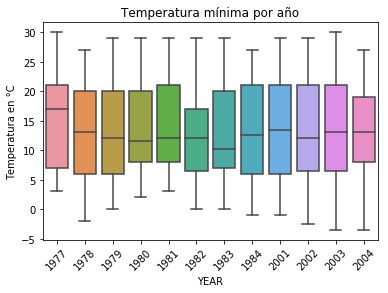

In [19]:
#Gráfica de temperatura mínima por año
w4 = sns.boxplot(x="YEAR", y="TMIN", data=df)
plt.xticks(rotation=45)
plt.title("Temperatura mínima por año")
plt.ylabel ("Temperatura en °C")
plt.show()

In [20]:
for i in range(1,4):
    r5=df[df.MONTH==i].TMIN.mean()
    print('mes',i,r5,'℃')

mes 1 5.212609970674487 ℃
mes 2 5.771704180064309 ℃
mes 3 7.873493975903615 ℃


In [21]:
#Calculando la temperatura min de los meses de invierno 
i12 = df[df.MONTH==12].TMIN.mean()
print("MES",12,"TEM",i12,"℃")
i1 = df[df.MONTH==1].TMIN.mean()
print("MES",1,"TEM",i1,"℃")
i2 = df[df.MONTH==2].TMIN.mean()
print("MES",2,"TEM",i2,"℃")
i3 = df[df.MONTH==3].TMIN.mean()
print("MES",3,"TEM",i3,"℃")

MES 12 TEM 5.184139784946237 ℃
MES 1 TEM 5.212609970674487 ℃
MES 2 TEM 5.771704180064309 ℃
MES 3 TEM 7.873493975903615 ℃


In [23]:
#Calculando la temperatura min de los meses de invierno 
v6 = df[df.MONTH==6].TMAX.mean()
print("MES",6,"TEM",v6,"℃")
v7 = df[df.MONTH==7].TMAX.mean()
print("MES",7,"TEM",v7,"℃")
v8 = df[df.MONTH==8].TMAX.mean()
print("MES",8,"TEM",v8,"℃")
v9 = df[df.MONTH==9].TMAX.mean()
print("MES",9,"TEM",v9,"℃")

MES 6 TEM 39.985 ℃
MES 7 TEM 40.36135693215339 ℃
MES 8 TEM 38.892183288409704 ℃
MES 9 TEM 37.78272980501393 ℃


In [73]:
#Calculando el promedio de temperatura máxima por año
init = df.YEAR.min()
AÑO = [init + i for i in range(0,28)]
AÑOS = [ df[df.YEAR==(init + i)].TMAX.mean() for i in range(0,28)]

d1 = {'AÑO': AÑO, 'PRECIP_TOTAL': AÑOS}
df3 = pd.DataFrame(data=d1)
df3.head()



,AÑO,PRECIP_TOTAL
0,1977,32.385621
1,1978,29.784615
2,1979,29.466849
3,1980,30.625683
4,1981,31.158904


In [76]:
#Calculando el promedio de temperatura mínima por año
init = df.YEAR.min()
AÑO2 = [init + i for i in range(0,28)]
AÑOS = [ df[df.YEAR==(init + i)].TMIN.mean() for i in range(0,28)]

d2 = {'AÑO': AÑO2, 'PRECIP_TOTAL': AÑOS}
df4 = pd.DataFrame(data=d2)
df4.head()

,AÑO,PRECIP_TOTAL
0,1977,15.039216
1,1978,13.230061
2,1979,12.704110
3,1980,13.497268
4,1981,13.953425
